## Non-Linear Dimensionality Reduction
**Using Gray Scale Images WxH = 40 X 30**</p>
**Using HOG feature of each image**</p>
**Adding BRISK**</p>

In [1]:
#import umap
import umap.umap_ as umap


In [2]:
import numpy as np
import pandas as pd
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import time

In [3]:
#this is the grayscale
source_df = pd.read_csv('gray_small_train_set.csv')

In [4]:
hog_df = pd.read_csv('hog_fd_train.csv')

In [5]:
brisk_df = pd.read_csv('brisk_train.csv')

In [6]:
source_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,255,255,255,255,254,241,236,234,220,...,253,253,254,254,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [14]:
hog_df.head(1)

,label,fd_value0,fd_value1,fd_value2,fd_value3,fd_value4,fd_value5,fd_value6,fd_value7,fd_value8,...,fd_value1718,fd_value1719,fd_value1720,fd_value1721,fd_value1722,fd_value1723,fd_value1724,fd_value1725,fd_value1726,fd_value1727
0,0.0,0.016479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705982,...,0.0,0.37049,0.002554,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
brisk_df.head(1)

,label,brisk0,brisk1,brisk2,brisk3,brisk4,brisk5,brisk6,brisk7,brisk8,...,brisk1190,brisk1191,brisk1192,brisk1193,brisk1194,brisk1195,brisk1196,brisk1197,brisk1198,brisk1199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
source_df.shape, hog_df.shape, brisk_df.shape

((3377, 1201), (3377, 1729), (3377, 1201))

**Run All Together: Grayscale wit HOG and BRISK vectors concantenated**

In [9]:
final_df = pd.concat([source_df, hog_df.iloc[:,1:], brisk_df.iloc[:,1:]], axis=1)

In [10]:
final_df.shape

(3377, 4129)

In [11]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data = final_df.iloc[:, 1:].values.astype(np.float32)


In [12]:
#target = source_df['class'].values
target = final_df['label'].values

In [13]:
data.shape, target.shape

((3377, 4128), (3377,))

In [14]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

In [15]:
color_key = {
    "0": "#FF0000",  # Bright Red, Pants
    "1": "#00FF00",  # Bright Green, T-shirts
    "2": "#0000FF",  # Bright Blue, Watches
    "3": "#FFFF00",  # Bright Yellow, Casual Shoes

}

In [18]:
# Initialize UMAP
percent=100
start_time = time.time()
reducer = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding = reducer.fit_transform(data)

# Prepare the data for visualization
df = pd.DataFrame(embedding, columns=('x', 'y'))

print('percent complete: ',percent, end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=False)


percent complete:  100 - 17.10249662399292 seconds -


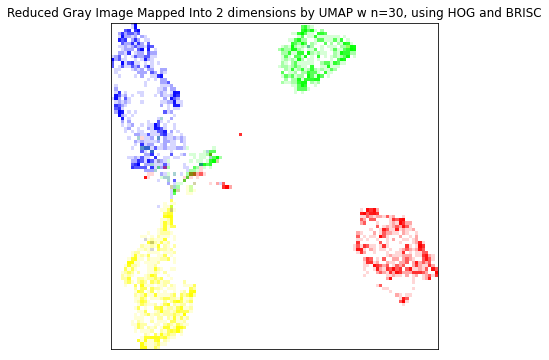

In [19]:
df['class'] = pd.Series([str(x) for x in target], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_hog_brisc_30', background='white')

# Display the image
image = plt.imread('gray_small_hog_brisc_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Reduced Gray Image Mapped Into 2 dimensions by UMAP w n=30, using HOG and BRISC", fontsize=12)
plt.show()




**There is no noticeable improvement in the seperation of clusters**

**Export Mapped Coordinates to CSV**

In [36]:
# Ensure target is a 2D array with shape (3377, 1)
target = target[:, np.newaxis]

# Concatenate along the second axis
emb_target = np.concatenate((target, embedding), axis=1)

column_names = ['label','embedding x', 'embedding y']
embedding_df = pd.DataFrame( emb_target, columns=column_names)
embedding_df.head()

embedding_df.to_csv('umap_train_gray_small_hog_brisk.csv', index=False, header=True)  

In [37]:
embedding_df = pd.read_csv('umap_train_gray_small_hog_brisk.csv')
embedding_df.head()

,label,embedding x,embedding y
0,0.0,9.754247,-6.922257
1,2.0,-1.047488,-1.155771
2,2.0,0.437209,0.162888
3,3.0,0.370313,-9.712300
4,1.0,6.782082,1.315297


**Save UMAP Embedding**

In [38]:
# Save the trained model
import joblib
joblib.dump(reducer, 'umap_model_gray_small_hog_brisk.pkl')



['umap_model_gray_small_hog_brisk.pkl']

### With Grayscale and HOG vector

In [16]:
final2_df = pd.concat([source_df, hog_df.iloc[:,1:]], axis=1)

In [17]:
#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data2 = final2_df.iloc[:, 1:].values.astype(np.float32)
target2 = final2_df['label'].values


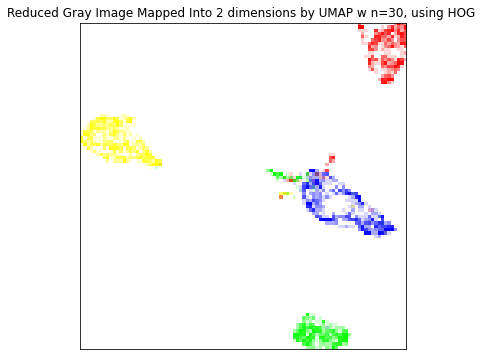

In [20]:
# Initialize UMAP
reducer2 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding2 = reducer2.fit_transform(data2)

# Prepare the data for visualization
df = pd.DataFrame(embedding2, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target2], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_hog_30', background='white')

# Display the image
image = plt.imread('gray_small_hog_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Reduced Gray Image Mapped Into 2 dimensions by UMAP w n=30, using HOG ", fontsize=12)
plt.show()




**The above results are almost identical then without includeing HOG feature.**

### Mapping HOG Features Only

In [26]:
color_key2 = {
    "0.0": "#FF0000",  # Bright Red, Pants
    "1.0": "#00FF00",  # Bright Green, T-shirts
    "2.0": "#0000FF",  # Bright Blue, Watches
    "3.0": "#FFFF00",  # Bright Yellow, Casual Shoes

}

In [21]:
#final_df = pd.concat([source_df, hog_df.iloc[:,1:]], axis=1)
#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data2 = hog_df.iloc[:, 1:].values.astype(np.float32)
target2 = hog_df['label'].values

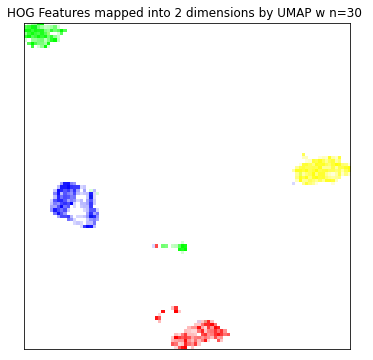

In [27]:
# Initialize UMAP
reducer2 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding2 = reducer2.fit_transform(data2)

# Prepare the data for visualization
df = pd.DataFrame(embedding2, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target2], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key2, how='eq_hist')
utils.export_image(img, filename='umap_hog_30', background='white')

# Display the image
image = plt.imread('umap_hog_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("HOG Features mapped into 2 dimensions by UMAP w n=30 ", fontsize=12)
plt.show()




**The HOG features by themeselves provide clear and better seperation of clusters**

## BRISK UMAP Mapping by itself

In [28]:
#final_df = pd.concat([source_df, hog_df.iloc[:,1:]], axis=1)
#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data2 = brisk_df.iloc[:, 1:].values.astype(np.float32)
target2 = brisk_df['label'].values

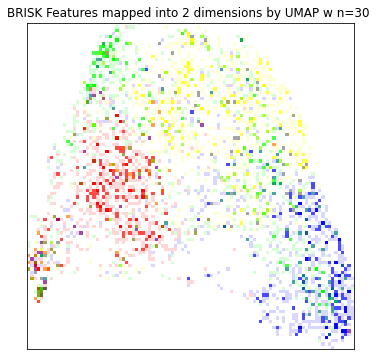

In [30]:
# Initialize UMAP
reducer2 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding2 = reducer2.fit_transform(data2)

# Prepare the data for visualization
df = pd.DataFrame(embedding2, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target2], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='umap_brisk_30', background='white')

# Display the image
image = plt.imread('umap_brisk_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("BRISK Features mapped into 2 dimensions by UMAP w n=30 ", fontsize=12)
plt.show()




**BRISC does not provide any useful clustering**